#  Particle Swarm Optimized  Convulutional Neural Network for Human Activity Recognition 

Activity Recognition aims at identifying the activity of users based on series of observations collected during the activity in a definite context environment.  Applications that are enabled with activity recognition are gaining huge attention, as users get personalized services and support based on their contextual behaviour. The proliferation of wearable devices and smartphones has provided real-time monitoring of human activities through sensors that are embedded in smart devices such as proximity sensors, cameras, microphone, magnetometers accelerometers, gyroscopes, GPS etc., Thus, understanding human activities in inferring the gesture or position has created a competitive challenge in building personal health care systems, examining wellness and fit characteristics, and most pre-dominantly in elderly care, abnormal activity detection, diabetes or epilepsy disorders etc.,


Initially, Human Activity Recognition (HAR) were carried out by attaching one or more dedicated on-body sensors to specific parts of human body to collect data [1–3].  As, the usage of smart phones for daily activities has increased extensively, HAR research has employed to collect data from built-in sensors embedded in smart phones. [4–6]. 






In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install pandas==0.20.0

     |████████████████████████████████| 10.3MB 2.7MB/s 
  Created wheel for pandas: filename=pandas-0.20.0-cp36-cp36m-linux_x86_64.whl size=21818326 sha256=7c73b49aab2ff4e6f04dfe020603f43fcf884c420a8111cdb3a670966164095a
  Stored in directory: /root/.cache/pip/wheels/b7/c9/bc/1be20e008803759282fd4fb0bc2453947643ffff7b38219d4e
Successfully built pandas
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.20.0 which is incompatible.
ERROR: seaborn 0.10.1 has requirement pandas>=0.22.0, but you'll have pandas 0.20.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.20.0 which is incompatible.
ERROR: pandas-datareader 0.8.1 has requirement pandas>=0.21, but you'll have pandas 0.20.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.20.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.20

# Problem Statement #

 + Activity Prediction

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# get the features from the file features.txt
features = list()
with open('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# Train the Data #

In [ ]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
786,0.336063,-0.018675,-0.113393,-0.330359,0.039965,-0.539313,-0.349797,0.053757,-0.515516,-0.286514,...,-0.924024,0.517304,0.07366,-0.923364,-0.948501,0.131501,0.031468,5,1,WALKING


In [ ]:
train.shape

(7352, 564)

# Test Data #

In [ ]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# Single Frame #
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2507,0.226991,0.014084,-0.074937,-0.081781,0.653238,-0.272614,-0.137727,0.640574,-0.267682,0.315096,...,0.490931,-0.011307,-0.9011,0.078507,-0.639639,0.346778,0.005567,20,1,WALKING


In [ ]:
test.shape

(2947, 564)

In [ ]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

# Data Cleaning

# Duplicates to Check #

In [ ]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


# Check for Null values

In [ ]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

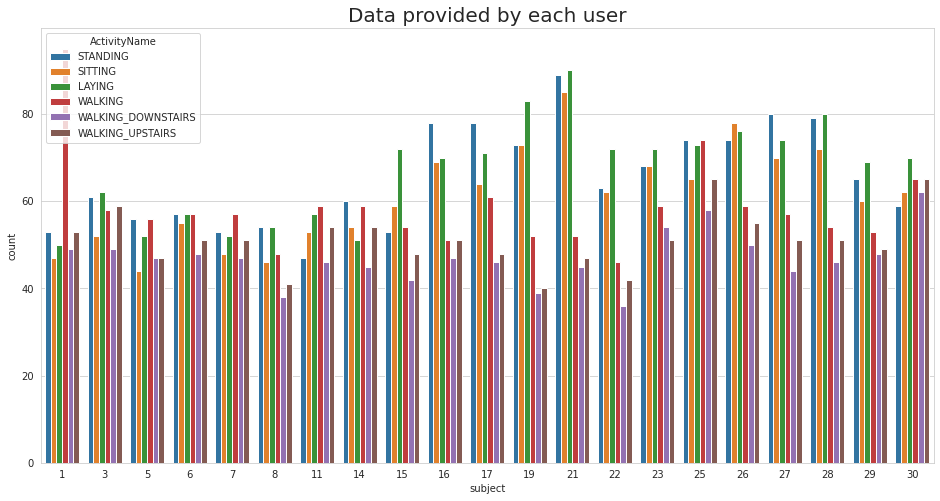

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


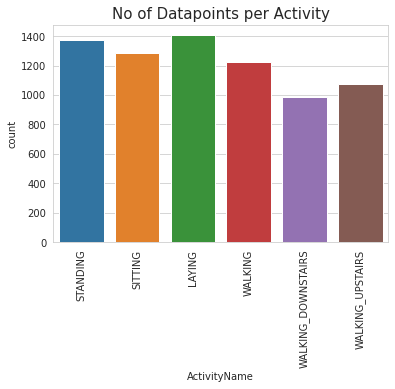

In [ ]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

# Changing feature names # 

In [ ]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

# Save this dataframe in a csv files #

In [ ]:
train.to_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/csv_files/train.csv', index=False)
test.to_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

### 2. Stationary and Moving activities are completely different

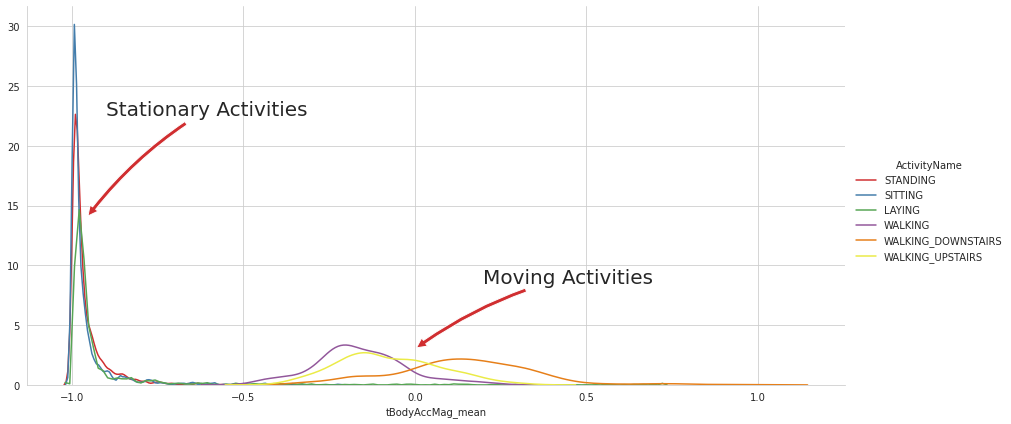

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag_mean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,14), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

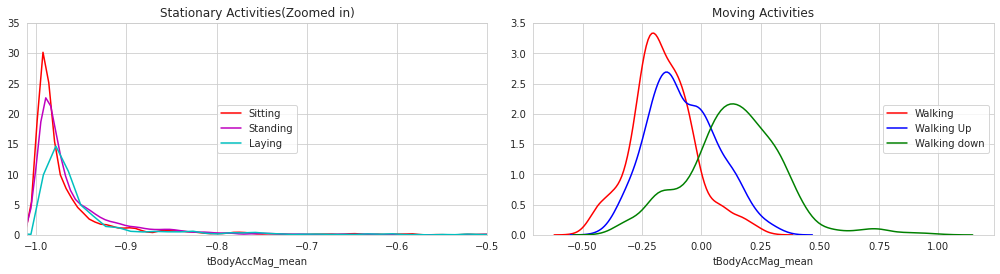

In [ ]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMag_mean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMag_mean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMag_mean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMag_mean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMag_mean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMag_mean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

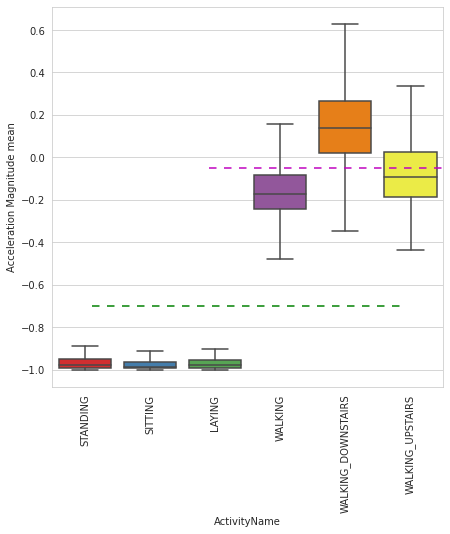

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMag_mean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- Let us consider If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

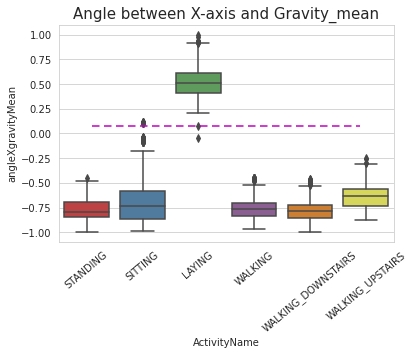

In [ ]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

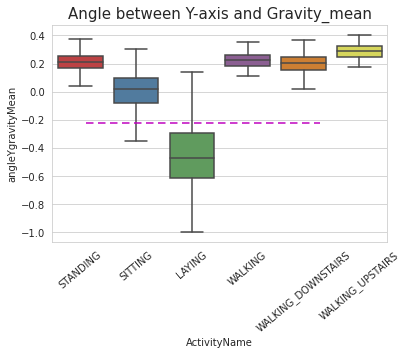

In [ ]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.563s...
[t-SNE] Computed neighbors for 7352 samples in 43.722s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.049s
[t-SNE] Iteration 50: error = 124.6273651, gradient norm = 0.0263724 (50 iterations in 3.665s)
[t-SNE] Iteration 100: error = 106.8721313, gradient norm = 0.0286466 (50 iterations in

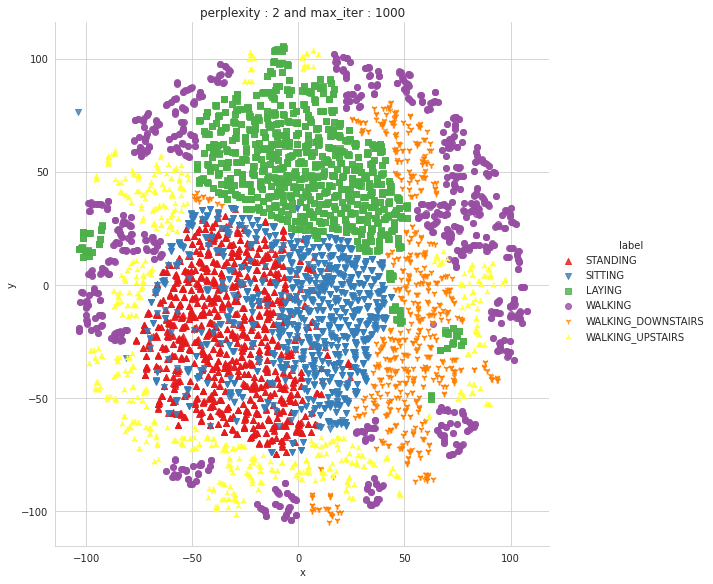

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.569s...
[t-SNE] Computed neighbors for 7352 samples in 44.920s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 114.1168976, gradient norm = 0.0198202 (50 iterations in 4.588s)
[t-SNE] Iteration 100: error = 98.1407700, gradient norm = 0.0165479 (50 iteratio

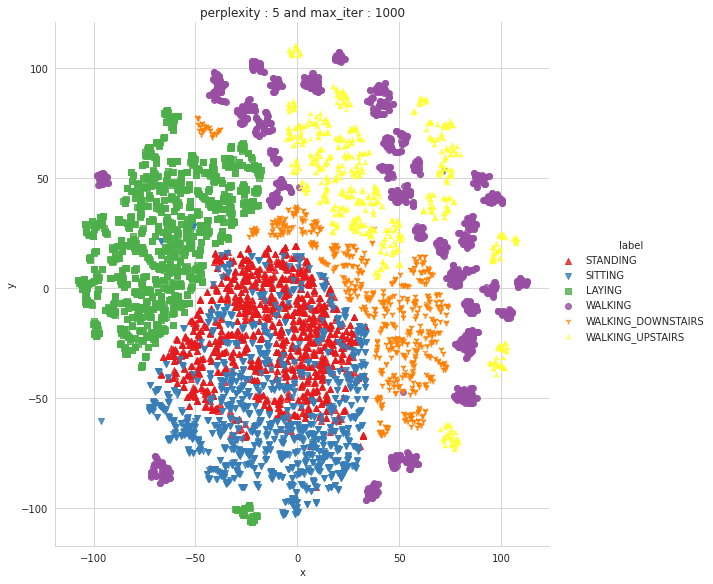

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.607s...
[t-SNE] Computed neighbors for 7352 samples in 45.627s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.142s
[t-SNE] Iteration 50: error = 105.5048828, gradient norm = 0.0251726 (50 iterations in 3.459s)
[t-SNE] Iteration 100: error = 89.9788666, gradient norm = 0.0096351 (50 iterati

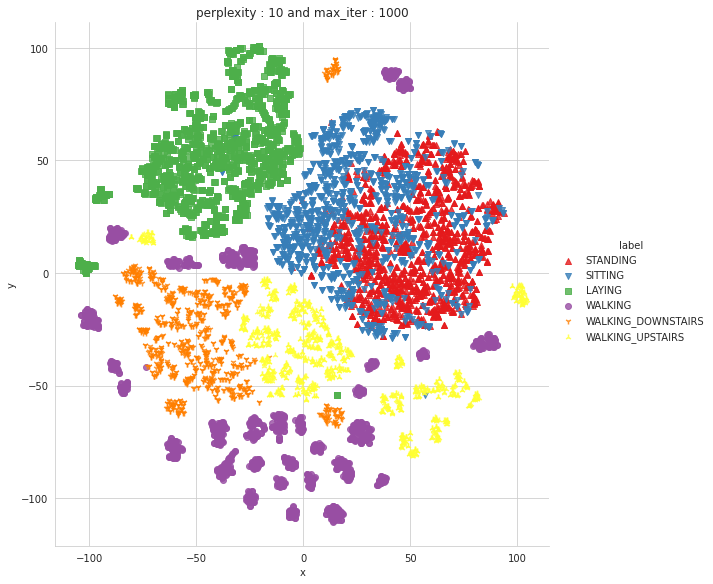

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.569s...
[t-SNE] Computed neighbors for 7352 samples in 46.553s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.259s
[t-SNE] Iteration 50: error = 95.9568481, gradient norm = 0.0336587 (50 iterations in 3.563s)
[t-SNE] Iteration 100: error = 83.7526855, gradient norm = 0.0068390 (50 iteratio

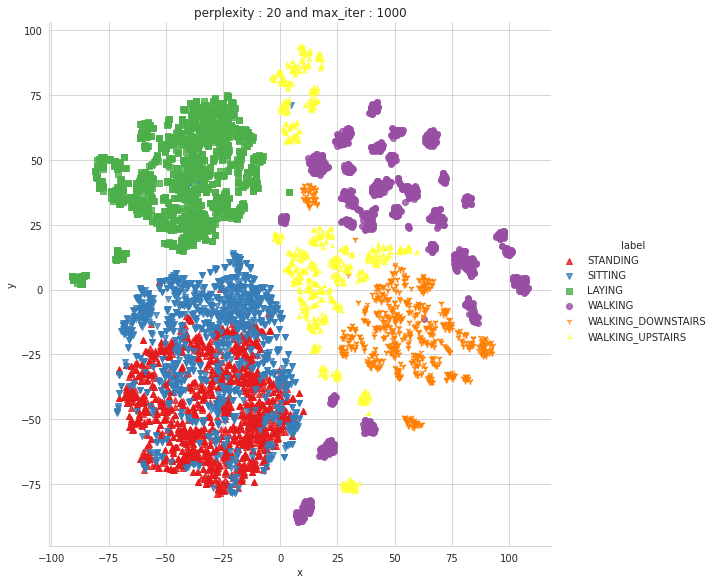

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.582s...
[t-SNE] Computed neighbors for 7352 samples in 48.808s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.650s
[t-SNE] Iteration 50: error = 84.7585373, gradient norm = 0.0323624 (50 iterations in 5.050s)
[t-SNE] Iteration 100: error = 75.5320511, gradient norm = 0.0038560 (50 iterati

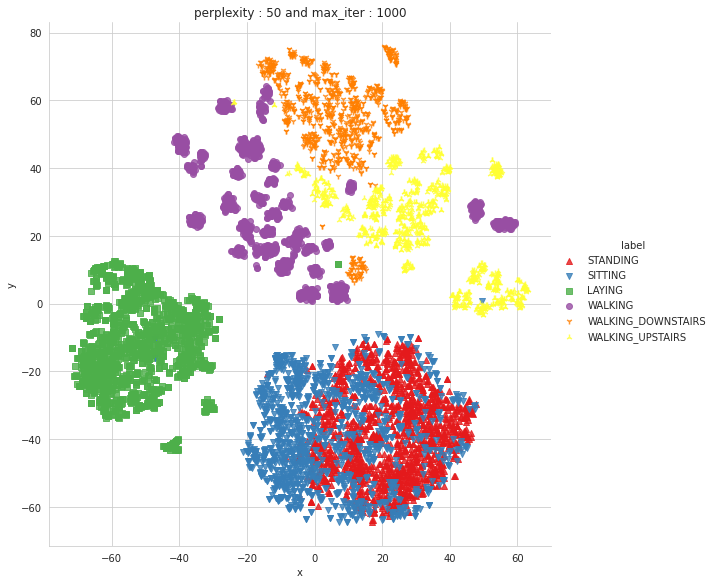

Done


In [ ]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])


performing tsne with perplexity 20 and with 2000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.556s...
[t-SNE] Computed neighbors for 7352 samples in 46.305s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.274s
[t-SNE] Iteration 50: error = 98.0214539, gradient norm = 0.0118977 (50 iterations in 3.585s)
[t-SNE] Iteration 100: error = 84.2546692, gradient norm = 0.0070746 (50 iterations in

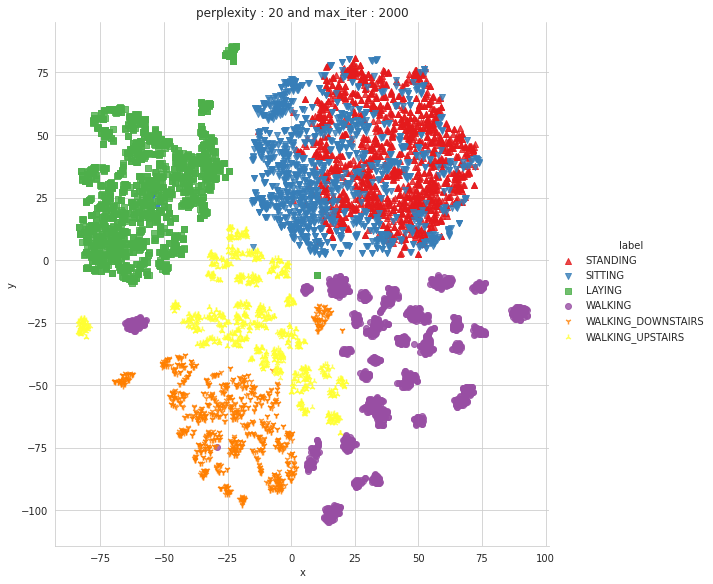

Done

performing tsne with perplexity 50 and with 2000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.599s...
[t-SNE] Computed neighbors for 7352 samples in 47.957s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.651s
[t-SNE] Iteration 50: error = 85.8416595, gradient norm = 0.0288497 (50 iterations in 4.647s)
[t-SNE] Iteration 100: error = 76.3491211, gradient norm = 0.0064064 (50 iterati

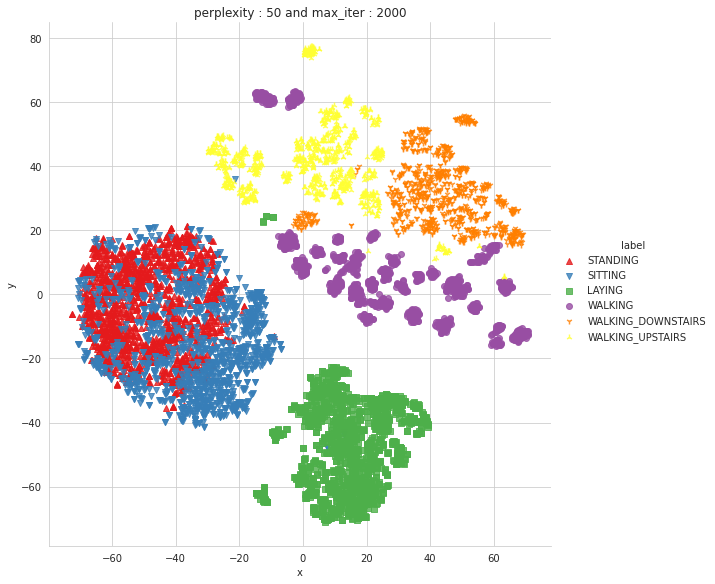

Done

performing tsne with perplexity 90 and with 2000 iterations at max
[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.598s...
[t-SNE] Computed neighbors for 7352 samples in 52.779s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.540175
[t-SNE] Computed conditional probabilities in 1.184s
[t-SNE] Iteration 50: error = 77.0120392, gradient norm = 0.0385083 (50 iterations in 5.218s)
[t-SNE] Iteration 100: error = 69.6183624, gradient norm = 0.0029640 (50 iterati

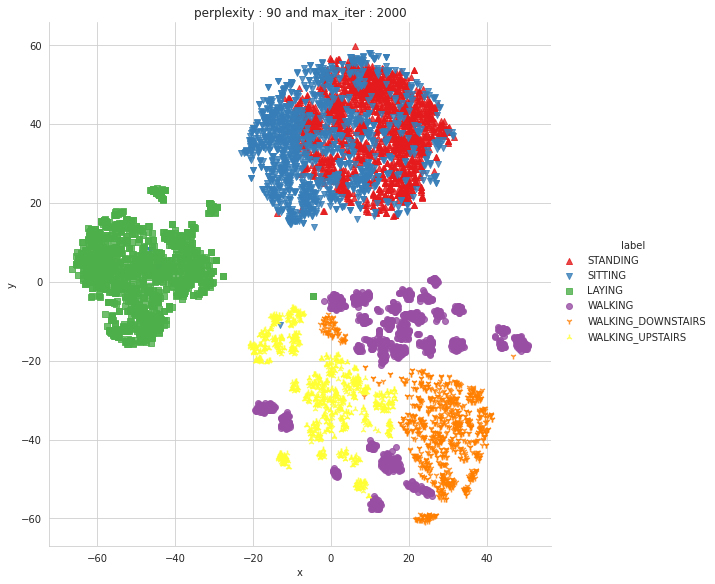

Done


In [ ]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20,50,90],n_iter=2000)

## Obtain the train and test data

In [ ]:
train = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/csv_files/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [ ]:
train.head(1)

,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING


In [ ]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [ ]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Model with our data #

### Labels that are useful in plotting confusion matrix

In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))
    

# Modeling with Machine Learning Algorithms

# 1. Logistic Regression with Grid Search

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   34.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:38.221343


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009503


---------------------
|      Accuracy      |
---------------------

    0.9586019681031558


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  15 517   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 402  14]
 [  0   0   0  25   1 445]]


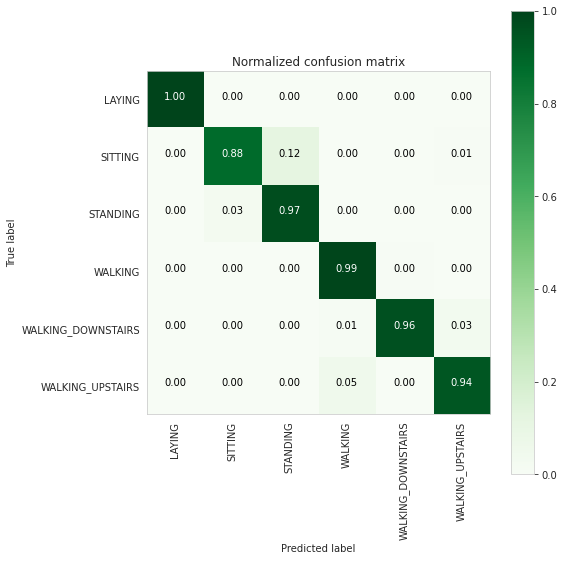

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

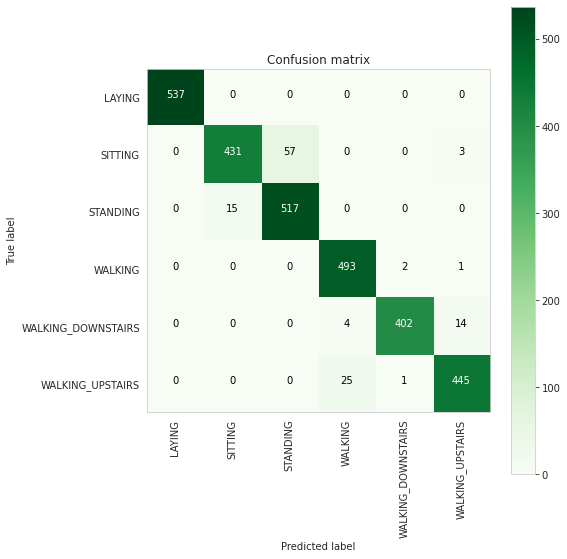

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9358015748118914



#  2. Linear SVC with GridSearch

In [ ]:
from sklearn.svm import LinearSVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:  1.8min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:56.564510


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009239


---------------------
|      Accuracy      |
---------------------

    0.9677638276213099


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 433  53   0   0   3]
 [  0  11 520   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


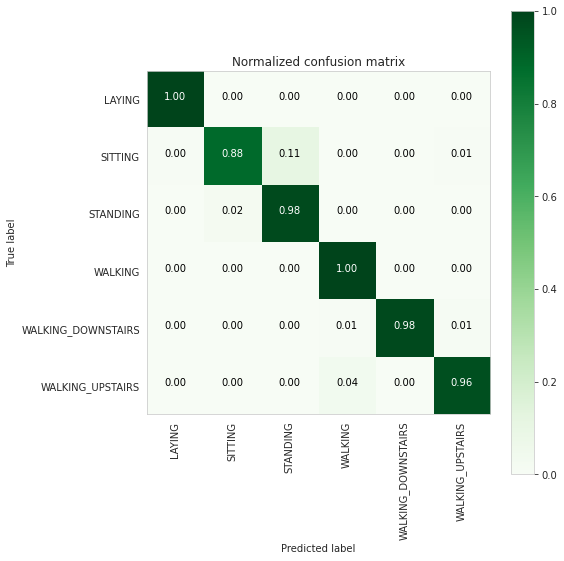

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [ ]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9455930359085963



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:21.703537


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.286671


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


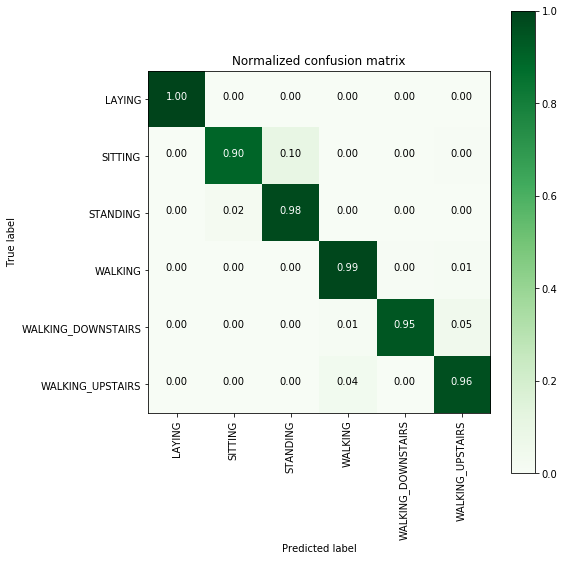

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:05.120427


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.002483


---------------------
|      Accuracy      |
---------------------

    0.8639294197488971


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  16 343  61]
 [  0   0   0  78  24 369]]


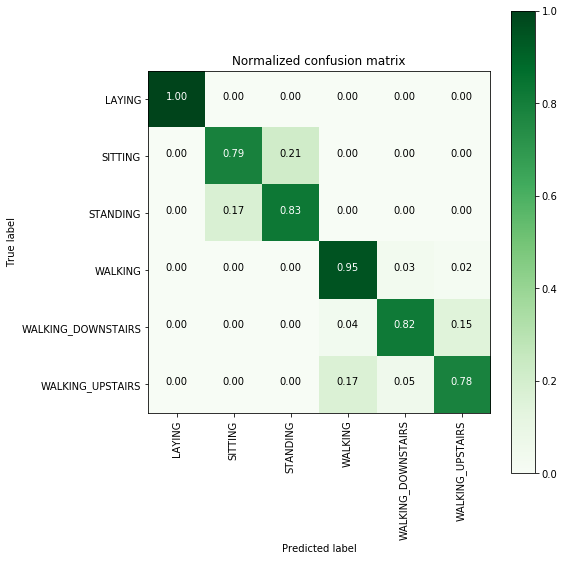

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

       avg / total       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=8)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:59.069438


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.033301


---------------------
|      Accuracy      |
---------------------

    0.9107567017305734


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 422  69   0   0   0]
 [  0  49 483   0   0   0]
 [  0   0   0 482  12   2]
 [  0   0   0  40 335  45]
 [  0   0   0  40   6 425]]


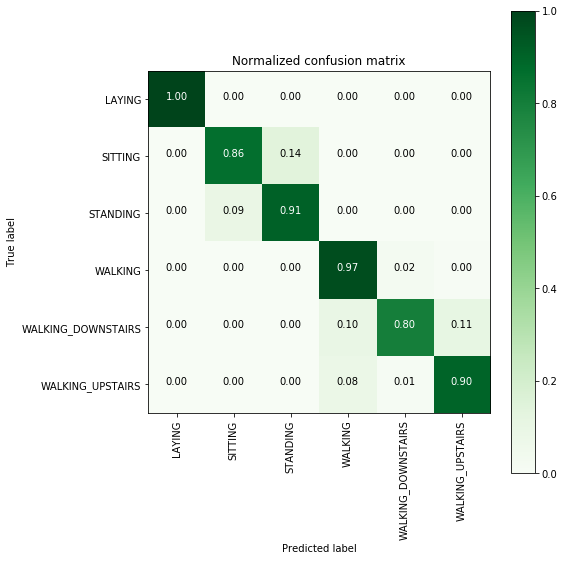

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.88      0.91      0.89       532
           WALKING       0.86      0.97      0.91       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

       avg / total       0.91      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=1,
            oob_score=Fals

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=8)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:17:12.707284


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.039210


---------------------
|      Accuracy      |
---------------------

    0.9226331862911435


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 399  90   0   0   2]
 [  0  38 494   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  32   6 432]]


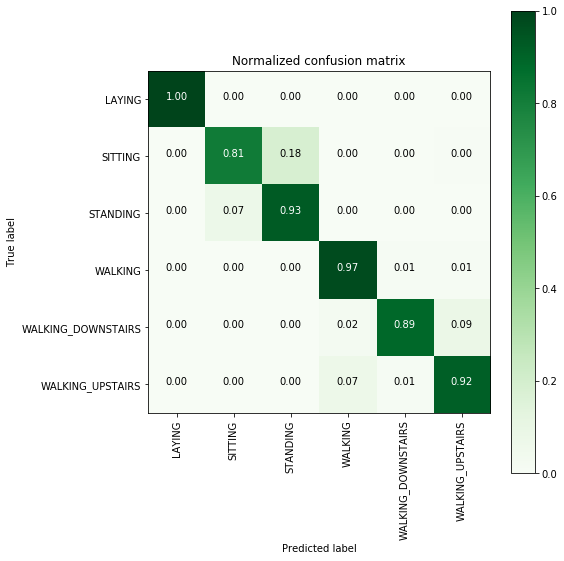

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

       avg / total       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimato

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=8)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])


# 7. Comparing all models

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.3%       3.699%
Linear SVC          : 96.5%       3.495% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.39%      13.61% 
Random Forest       : 91.08%      8.924% 
GradientBoosting DT : 91.08%      8.924% 


# Using raw time series data and deep learning methods 
These are the following models:

Model 1 - Using LSTM  
Model 2 - Using CNN 

Model 3 - PSO Optimized CNN

## LSTM

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

ImportError: ignored

In [ ]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [ ]:
# Data directory
DATADIR = '/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset'
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [ ]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [ ]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [ ]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, y_train, X_test,  y_test

In [ ]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
#tf.random.set_seed(36)

AttributeError: ignored

In [ ]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [ ]:
pip install keras==2.3.1

     |████████████████████████████████| 378kB 2.7MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [ ]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
# Loading the train and test data
X_train, Y_train, X_test,  Y_test = load_data()

In [ ]:
X_train.shape,Y_train.shape, X_test.shape, Y_test.shape

((7352, 128, 9), (7352, 6), (2947, 128, 9), (2947, 6))

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)
#n_classes  = 6
print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


#### Base Model

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5376      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/30
460/460 [==============================] - 20s 44ms/step - loss: 1.2609 - accuracy: 0.4621 - val_loss: 1.4006 - val_accuracy: 0.3312
Epoch 2/30
460/460 [==============================] - 20s 43ms/step - loss: 0.9335 - accuracy: 0.5279 - val_loss: 1.8866 - val_accuracy: 0.3414
Epoch 3/30
460/460 [==============================] - 20s 43ms/step - loss: 0.8143 - accuracy: 0.5492 - val_loss: 0.9096 - val_accuracy: 0.4985
Epoch 4/30
460/460 [==============================] - 20s 43ms/step - loss: 0.7301 - accuracy: 0.6104 - val_loss: 0.6206 - val_accuracy: 0.6233
Epoch 5/30
460/460 [==============================] - 20s 43ms/step - loss: 0.6129 - accuracy: 0.7344 - val_loss: 0.6254 - val_accuracy: 0.7608
Epoch 6/30
460/460 [==============================] - 21s 45ms/step - loss: 0.5305 - accuracy: 0.8022 - val_loss: 0.5973 - val_accuracy: 0.7655
Epoch 7/30
460/460 [==============================] - 22s 47ms/step - loss: 0.4633 - accuracy: 0.8424 - val_loss: 0.4312 - val_accuracy:

#### Multi layer LSTM

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_2 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/30
460/460 [==============================] - 42s 91ms/step - loss: 1.2376 - accuracy: 0.5048 - val_loss: 0.9601 - val_accuracy: 0.5935
Epoch 2/30
460/460 [==============================] - 41s 89ms/step - loss: 0.8455 - accuracy: 0.6230 - val_loss: 0.8185 - val_accuracy: 0.6159
Epoch 3/30
460/460 [==============================] - 41s 90ms/step - loss: 0.7259 - accuracy: 0.7055 - val_loss: 0.8059 - val_accuracy: 0.6569
Epoch 4/30
460/460 [==============================] - 41s 89ms/step - loss: 0.6298 - accuracy: 0.7550 - val_loss: 0.7523 - val_accuracy: 0.6926
Epoch 5/30
460/460 [==============================] - 41s 90ms/step - loss: 0.5243 - accuracy: 0.7772 - val_loss: 0.5464 - val_accuracy: 0.7757
Epoch 6/30
460/460 [==============================] - 41s 89ms/step - loss: 0.4656 - accuracy: 0.7933 - val_loss: 0.5467 - val_accuracy: 0.7893
Epoch 7/30
460/460 [==============================] - 41s 89ms/step - loss: 0.4327 - accuracy: 0.7984 - val_loss: 0.6578 - val_accuracy:

Above 2 layer LSTM is giving similar score as 1 layer LSTM which we trained above. 

In [ ]:
from keras.regularizers import l2

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,recurrent_regularizer=l2(0.003),return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_4 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Training the model
History = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=10)

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 107s 15ms/step - loss: 1.4263 - acc: 0.4241 - val_loss: 1.2625 - val_acc: 0.5175
Epoch 2/10
7352/7352 [==============================] - 105s 14ms/step - loss: 1.2066 - acc: 0.5011 - val_loss: 1.5878 - val_acc: 0.3549
Epoch 3/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.9923 - acc: 0.5695 - val_loss: 0.9060 - val_acc: 0.6162
Epoch 4/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.9109 - acc: 0.5839 - val_loss: 0.8547 - val_acc: 0.5962
Epoch 5/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.7995 - acc: 0.6223 - val_loss: 0.7806 - val_acc: 0.6176
Epoch 6/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.8123 - acc: 0.6062 - val_loss: 0.8927 - val_acc: 0.5887
Epoch 7/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.7574 - acc: 0.6319 - val_loss: 0.7507 - val_acc: 

### Hyperparameter Tuning Using Hyperas:

In [ ]:
# Importing tensorflow
np.random.seed(36)
import tensorflow as tf
tf.random.set_seed(36)

In [ ]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperas.utils import eval_hyperopt_space

In [ ]:
pip install hyperas

In [ ]:
##gives train and validation data 
def data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = '/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        return pd.get_dummies(y).as_matrix()
    
    X_train, X_val = load_signals('train'), load_signals('test')
    Y_train, Y_val = load_y('train'), load_y('test')

    return X_train, Y_train, X_val,  Y_val

In [ ]:
from keras.regularizers import l2
import keras

In [ ]:
##model
def model(X_train, Y_train, X_val, Y_val):
    # Importing tensorflow
    np.random.seed(36)
    import tensorflow as tf
    tf.random.set_seed(36)
    # Initiliazing the sequential model
    model = Sequential() 
    if conditional({{choice(['one', 'two'])}}) == 'two':
        # Configuring the parameters
        model.add(LSTM({{choice([28,32,38])}},recurrent_regularizer=l2({{uniform(0,0.0002)}}),return_sequences=True,input_shape=(128, 9),name='LSTM2_1'))
        # Adding a dropout layer
        model.add(Dropout({{uniform(0.35,0.65)}},name='Dropout2_1'))
        model.add(LSTM({{choice([26,32,36])}},recurrent_regularizer=l2({{uniform(0,0.001)}}),input_shape=(128, 9),name='LSTM2_2'))
        model.add(Dropout({{uniform(0.5,0.7)}},name='Dropout2_2'))
        # Adding a dense output layer with sigmoid activation
        model.add(Dense(6, activation='sigmoid'))
    else:
        # Configuring the parameters
        model.add(LSTM({{choice([28,32,36])}},recurrent_regularizer=l2({{uniform(0,0.001)}}),input_shape=(128, 9),name='LSTM1_1'))
        # Adding a dropout layer
        model.add(Dropout({{uniform(0.35,0.55)}},name='Dropout1_1'))
        # Adding a dense output layer with sigmoid activation
        model.add(Dense(6, activation='sigmoid'))
        
    adam = keras.optimizers.Adam(lr={{uniform(0.009,0.025)}})
    rmsprop = keras.optimizers.RMSprop(lr={{uniform(0.009,0.025)}})
   
    choiceval = {{choice(['adam', 'rmsprop'])}}
    
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    
    print(model.summary())
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    result = model.fit(X_train, Y_train,
              batch_size=16,
              epochs=30,
              verbose=2,
              validation_data=(X_val, Y_val))
                       
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    print('Test accuracy:', acc)
    print('-------------------------------------------------------------------------------------')
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [ ]:
X_train, Y_train, X_val, Y_val = data()
trials = Trials()
best_run, best_model, space = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=15,
                                      trials=trials,notebook_name = 'Human Activity Detection',
                                     return_space = True)

FileNotFoundError: ignored

In [ ]:
total_trials = dict()
for t, trial in enumerate(trials):
        vals = trial.get('misc').get('vals')
        print('Model',t+1,'parameters')
        print(vals)
        print()
        z = eval_hyperopt_space(space, vals)
        total_trials['M'+str(t+1)] = z
        print(z)
        print('------------------------------------------------')

Model 1 parameters
{'Dropout': [0.36598023572757926], 'Dropout_1': [0.6047146037530785], 'Dropout_2': [0.5188826519950874], 'LSTM': [0], 'LSTM_1': [1], 'LSTM_2': [1], 'choiceval': [1], 'conditional': [0], 'l2': [0.00016900597529479822], 'l2_1': [0.0006108763092812357], 'l2_2': [0.0007371698374615214], 'lr': [0.01942874904782045], 'lr_1': [0.015993860150909475]}

{'Dropout': 0.36598023572757926, 'Dropout_1': 0.6047146037530785, 'Dropout_2': 0.5188826519950874, 'LSTM': 28, 'LSTM_1': 32, 'LSTM_2': 32, 'choiceval': 'rmsprop', 'conditional': 'one', 'l2': 0.00016900597529479822, 'l2_1': 0.0006108763092812357, 'l2_2': 0.0007371698374615214, 'lr': 0.01942874904782045, 'lr_1': 0.015993860150909475}
------------------------------------------------
Model 2 parameters
{'Dropout': [0.604072168386432], 'Dropout_1': [0.5642077861572957], 'Dropout_2': [0.4689742513688654], 'LSTM': [0], 'LSTM_1': [1], 'LSTM_2': [0], 'choiceval': [1], 'conditional': [1], 'l2': [2.221286943616341e-06], 'l2_1': [0.0009770

In [ ]:
best_run

{'Dropout': 0.3802031741395868,
 'Dropout_1': 0.6903389204823146,
 'Dropout_2': 0.3654341425327902,
 'LSTM': 2,
 'LSTM_1': 2,
 'LSTM_2': 1,
 'choiceval': 0,
 'conditional': 0,
 'l2': 0.00015208023802140732,
 'l2_1': 0.000643128044948208,
 'l2_2': 0.0007102309264917989,
 'lr': 0.016347608866364167,
 'lr_1': 0.024543333891182614}

In [ ]:
#BEST MODEL PARAMS
total_trials['M14']

{'Dropout': 0.3802031741395868,
 'Dropout_1': 0.6903389204823146,
 'Dropout_2': 0.3654341425327902,
 'LSTM': 38,
 'LSTM_1': 36,
 'LSTM_2': 32,
 'choiceval': 'adam',
 'conditional': 'one',
 'l2': 0.00015208023802140732,
 'l2_1': 0.000643128044948208,
 'l2_2': 0.0007102309264917989,
 'lr': 0.016347608866364167,
 'lr_1': 0.024543333891182614}

In [ ]:
#layes of best model
best_model.layers

In [ ]:
X_train, Y_train, X_val, Y_val = data()

In [ ]:
_,val_acc = best_model.evaluate(X_val, Y_val, verbose=0)
_,train_acc = best_model.evaluate(X_train, Y_train, verbose=0)
print('Train_accuracy',val_acc)
print('validation accuracy',val_acc)

Train_accuracy 0.94560663764961915
validation accuracy 0.9199185612487275


In [ ]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix_rnn(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    #return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return metrics.confusion_matrix(Y_true, Y_pred)

In [ ]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, best_model.predict(X_val)))

[[537   0   0   0   0   0]
 [  1 412  75   0   0   3]
 [  0  88 444   0   0   0]
 [  0   0   0 464  10  22]
 [  0   0   0  15 390  15]
 [  0   4   0   2   1 464]]


In [ ]:
from sklearn import metrics

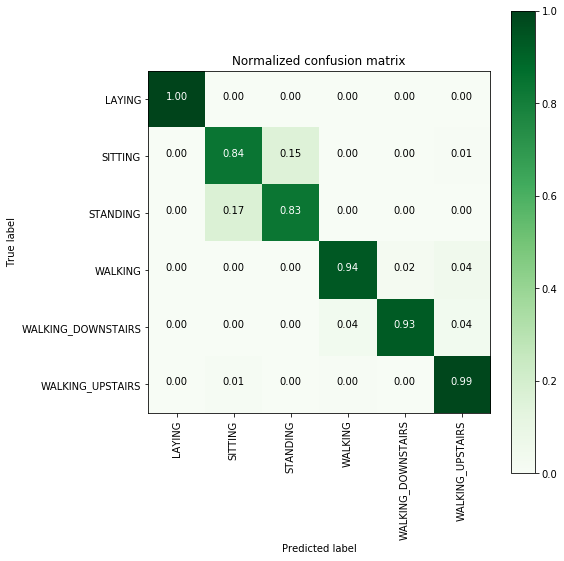

In [ ]:
plt.figure(figsize=(8,8))
cm = confusion_matrix_rnn(Y_val, best_model.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

## Using CNN

In [ ]:
import os
os.environ['PYTHONHASHSEED'] = '0'
import numpy as np
import tensorflow as tf
import random as rn
np.random.seed(36)
rn.seed(36)
#tf.random.set_seed(36)
# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

#tf.set_random_seed(36)
#tf.random.set_seed(36)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [ ]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [ ]:
X_train, Y_train, X_val, Y_val = data()

In [ ]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((7352, 128, 9), (7352, 6), (2947, 128, 9), (2947, 6))

In [ ]:
X_train.shape,Y_train.shape,X_val.shape, Y_val.shape

((7352, 128, 9), (7352, 6), (2947, 128, 9), (2947, 6))

In [ ]:
###Scling data
from sklearn.base import BaseEstimator, TransformerMixin
class scaling_tseries_data(BaseEstimator, TransformerMixin):
    from sklearn.preprocessing import StandardScaler
    def __init__(self):
        self.scale = None

    def transform(self, X):
        temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
        temp_X1 = self.scale.transform(temp_X1)
        return temp_X1.reshape(X.shape)

    def fit(self, X):
        # remove overlaping
        remove = int(X.shape[1] / 2)
        temp_X = X[:, -remove:, :]
        # flatten data
        temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
        scale = StandardScaler()
        scale.fit(temp_X)
        self.scale = scale
        return self

In [ ]:
Scale = scaling_tseries_data()
Scale.fit(X_train)
X_train_sc = Scale.transform(X_train)
X_val_sc = Scale.transform(X_val)

In [ ]:
print('Shape of scaled X train',X_train_sc.shape)
print('Shape of scaled X test',X_val_sc.shape)

Shape of scaled X train (7352, 128, 9)
Shape of scaled X test (2947, 128, 9)


#### Base Model

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform',input_shape=(128,9)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 32)           896       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 124, 32)           3104      
_________________________________________________________________
dropout_5 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1984)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                99250     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_sc,Y_train, epochs=30, batch_size=16,validation_data=(X_val_sc, Y_val), verbose=1)

Epoch 1/30
460/460 [==============================] - 4s 8ms/step - loss: 0.4801 - accuracy: 0.8183 - val_loss: 0.5080 - val_accuracy: 0.8195
Epoch 2/30
460/460 [==============================] - 4s 8ms/step - loss: 0.1560 - accuracy: 0.9368 - val_loss: 0.3850 - val_accuracy: 0.8887
Epoch 3/30
460/460 [==============================] - 4s 8ms/step - loss: 0.1159 - accuracy: 0.9489 - val_loss: 0.3530 - val_accuracy: 0.8962
Epoch 4/30
460/460 [==============================] - 4s 8ms/step - loss: 0.1040 - accuracy: 0.9523 - val_loss: 0.4609 - val_accuracy: 0.9094
Epoch 5/30
460/460 [==============================] - 4s 8ms/step - loss: 0.0930 - accuracy: 0.9603 - val_loss: 0.4414 - val_accuracy: 0.8853
Epoch 6/30
460/460 [==============================] - 4s 8ms/step - loss: 0.0933 - accuracy: 0.9622 - val_loss: 0.4723 - val_accuracy: 0.8850
Epoch 7/30
460/460 [==============================] - 4s 8ms/step - loss: 0.0916 - accuracy: 0.9604 - val_loss: 0.4849 - val_accuracy: 0.8514
Epoch 

it is giving some good score in train as well as test but it is overfitting so much. i will try some regularization in below models. 

In [ ]:
from keras.regularizers import l2,l1
import keras
from keras.layers import BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.1),input_shape=(128,9)))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu',kernel_regularizer=l2(0.06),kernel_initializer='he_uniform'))
model.add(Dropout(0.65))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 126, 32)           896       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 124, 16)           1552      
_________________________________________________________________
dropout_6 (Dropout)          (None, 124, 16)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 992)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                31776     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                

In [ ]:
import math
adam = keras.optimizers.Adam(lr=0.001)
rmsprop = keras.optimizers.RMSprop(lr=0.001)
def step_decay(epoch):
    return float(0.001 * math.pow(0.6, math.floor((1+epoch)/10)))
from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model.fit(X_train_sc,Y_train, epochs=30, batch_size=16,validation_data=(X_val_sc, Y_val), verbose=1)

Epoch 1/30
460/460 [==============================] - 3s 7ms/step - loss: 4.0418 - accuracy: 0.7667 - val_loss: 1.4053 - val_accuracy: 0.7845
Epoch 2/30
460/460 [==============================] - 3s 6ms/step - loss: 0.6782 - accuracy: 0.9059 - val_loss: 0.6418 - val_accuracy: 0.8619
Epoch 3/30
460/460 [==============================] - 3s 6ms/step - loss: 0.3837 - accuracy: 0.9184 - val_loss: 0.5547 - val_accuracy: 0.8565
Epoch 4/30
460/460 [==============================] - 3s 6ms/step - loss: 0.3147 - accuracy: 0.9283 - val_loss: 0.4926 - val_accuracy: 0.8789
Epoch 5/30
460/460 [==============================] - 3s 6ms/step - loss: 0.2933 - accuracy: 0.9301 - val_loss: 0.4626 - val_accuracy: 0.8816
Epoch 6/30
460/460 [==============================] - 3s 6ms/step - loss: 0.2564 - accuracy: 0.9357 - val_loss: 0.4390 - val_accuracy: 0.8931
Epoch 7/30
460/460 [==============================] - 3s 6ms/step - loss: 0.2372 - accuracy: 0.9392 - val_loss: 0.4588 - val_accuracy: 0.8714
Epoch 

#### Hyper Parameter Tuning Using Hyperas

In [ ]:
def data_scaled():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = '/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    from sklearn.base import BaseEstimator, TransformerMixin
    class scaling_tseries_data(BaseEstimator, TransformerMixin):
        from sklearn.preprocessing import StandardScaler
        def __init__(self):
            self.scale = None

        def transform(self, X):
            temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
            temp_X1 = self.scale.transform(temp_X1)
            return temp_X1.reshape(X.shape)

        def fit(self, X):
            # remove overlaping
            remove = int(X.shape[1] / 2)
            temp_X = X[:, -remove:, :]
            # flatten data
            temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
            scale = StandardScaler()
            scale.fit(temp_X)
            self.scale = scale
            return self
        
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'/content/gdrive/My Drive/UCI HAR Dataset/UCI HAR Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        return pd.get_dummies(y).as_matrix()
    
    X_train, X_val = load_signals('train'), load_signals('test')
    Y_train, Y_val = load_y('train'), load_y('test')
    ###Scling data
    Scale = scaling_tseries_data()
    Scale.fit(X_train)
    X_train = Scale.transform(X_train)
    X_val = Scale.transform(X_val)

    return X_train, Y_train, X_val,  Y_val

In [ ]:
X_train, Y_train, X_val,  Y_val = data_scaled()

In [ ]:
X_train.shape,Y_train.shape, X_val.shape, Y_val.shape

((7352, 128, 9), (7352, 6), (2947, 128, 9), (2947, 6))

In [ ]:
def model_cnn(X_train, Y_train, X_val, Y_val):
    # Importing tensorflow
    np.random.seed(36)
    import tensorflow as tf
    tf.random.set_seed(36)
    # Initiliazing the sequential model
    model = Sequential()
    
    model.add(Conv1D(filters={{choice([28,32,42])}}, kernel_size={{choice([3,5,7])}},activation='relu',kernel_initializer='he_uniform',
                 kernel_regularizer=l2({{uniform(0,2.5)}}),input_shape=(128,9)))
    
    model.add(Conv1D(filters={{choice([16,24,32])}}, kernel_size={{choice([3,5,7])}}, 
                     activation='relu',kernel_regularizer=l2({{uniform(0,1.5)}}),kernel_initializer='he_uniform'))
    model.add(Dropout({{uniform(0.45,0.7)}}))
    model.add(MaxPooling1D(pool_size={{choice([2,3])}}))
    model.add(Flatten())
    model.add(Dense({{choice([32,64])}}, activation='relu'))
    model.add(Dense(6, activation='softmax'))
        
    adam = keras.optimizers.Adam(lr={{uniform(0.00065,0.004)}})
    rmsprop = keras.optimizers.RMSprop(lr={{uniform(0.00065,0.004)}})
   
    choiceval = {{choice(['adam', 'rmsprop'])}}
    
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    
    print(model.summary())
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    result = model.fit(X_train, Y_train,
              batch_size={{choice([16,32,64])}},
              epochs={{choice([25,30,35])}},
              verbose=2,
              validation_data=(X_val, Y_val))
                       
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    score1, acc1 = model.evaluate(X_train, Y_train, verbose=0)
    print('Train accuracy',acc1,'Test accuracy:', acc)
    print('-------------------------------------------------------------------------------------')
    return {'loss': -acc, 'status': STATUS_OK, 'model': model,'train_acc':acc1}

In [ ]:
X_train, Y_train, X_val, Y_val = data_scaled()
trials = Trials()
best_run, best_model, space = optim.minimize(model=model_cnn,
                                      data=data_scaled,
                                      algo=tpe.suggest,
                                      max_evals=100,
                                      trials=trials,notebook_name = 'Human Activity Detection-Without Verbose ',
                                      return_space = True)

Streaming output truncated to the last 5000 lines.
Epoch 30/30
115/115 - 2s - loss: 0.2250 - accuracy: 0.9385 - val_loss: 0.3748 - val_accuracy: 0.8795

Train accuracy
0.9234222173690796
Test accuracy:
0.8795385360717773
-------------------------------------------------------------------------------------
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 124, 32)           1472      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 118, 16)           3600      
_________________________________________________________________
dropout_17 (Dropout)         (None, 118, 16)           0         
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 39, 16)            0         
_________________________________________________________________
flatten_12

KeyboardInterrupt: ignored

In [ ]:
from hyperas.utils import eval_hyperopt_space
total_trials = dict()
total_list = []
for t, trial in enumerate(trials):
        vals = trial.get('misc').get('vals')
        z = eval_hyperopt_space(space, vals)
        total_trials['M'+str(t+1)] = z

In [ ]:
best_run

{'Dense': 1,
 'Dropout': 0.6397045095598795,
 'batch_size': 2,
 'choiceval': 0,
 'filters': 1,
 'filters_1': 1,
 'kernel_size': 2,
 'kernel_size_1': 0,
 'l2': 0.07999281751224634,
 'l2_1': 0.0012673510937627475,
 'lr': 0.0011215010543928203,
 'lr_1': 0.0021517590741381726,
 'nb_epoch': 0,
 'pool_size': 1}

In [ ]:
#best Hyper params from hyperas
eval_hyperopt_space(space, best_run)

{'Dense': 64,
 'Dropout': 0.6397045095598795,
 'batch_size': 64,
 'choiceval': 'adam',
 'filters': 32,
 'filters_1': 24,
 'kernel_size': 7,
 'kernel_size_1': 3,
 'l2': 0.07999281751224634,
 'l2_1': 0.0012673510937627475,
 'lr': 0.0011215010543928203,
 'lr_1': 0.0021517590741381726,
 'nb_epoch': 25,
 'pool_size': 3}

In [ ]:
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_119 (Conv1D)          (None, 122, 32)           2048      
_________________________________________________________________
conv1d_120 (Conv1D)          (None, 120, 24)           2328      
_________________________________________________________________
dropout_60 (Dropout)         (None, 120, 24)           0         
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 40, 24)            0         
_________________________________________________________________
flatten_60 (Flatten)         (None, 960)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 64)                61504     
_________________________________________________________________
dense_120 (Dense)            (None, 6)                 390       
Total para

In [ ]:
_,acc_val = best_model.evaluate(X_val,Y_val,verbose=0)
_,acc_train = best_model.evaluate(X_train,Y_train,verbose=0)
print('Train_accuracy',acc_train,'test_accuracy',acc_val)

Train_accuracy 0.963139281828074 test_accuracy 0.9229725144214456


In [ ]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, best_model.predict(X_val)))

[[537   0   0   0   0   0]
 [  0 385  81   0   0  25]
 [  0  80 452   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0   0 415   5]
 [  0   1   0   0  23 447]]


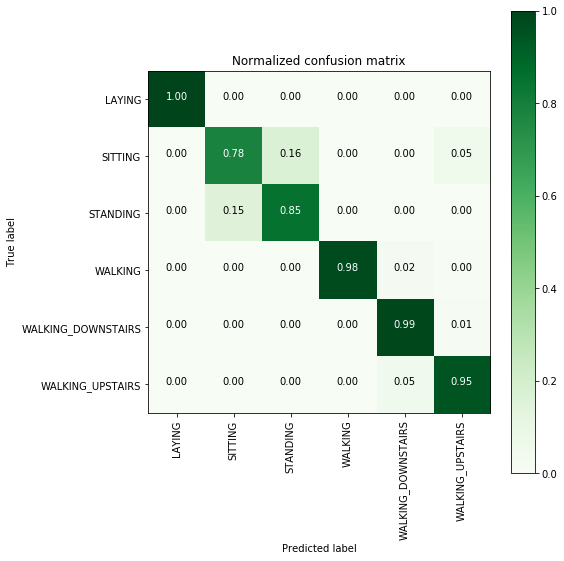

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
cm = confusion_matrix_rnn(Y_val, best_model.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

# **`PSO OPTIMIZED CNN `**



In [ ]:
import time
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import optimizers
import tensorflow as tf

In [ ]:
X_val,Y_val
X_train,Y_train,


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/Hyperactive')

In [ ]:
#import hyperactive
import sklearn.externals
import joblib
#from hyperactive.Hyperactive import ParticleSwarmOptimizer
#from hyperactive import ParticleSwarmOptimizer
from hyperactive import RandomSearchOptimizer, ParticleSwarmOptimizer

#import RandomSearchOptimizer, ParticleSwarmOptimizer
#from hyperactive import ParticleSwarmOptimizer



In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras.layers import Dense, Conv21D, MaxPooling1D, Flatten, Activation, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
sgd = optimizers.SGD(lr=0.01)
adam = optimizers.Adam(lr=0.01)

In [ ]:
search_config = {
    "keras.compile.0": {"loss": ["categorical_crossentropy"], "optimizer": [adam, sgd]},
    "keras.fit.0": {"epochs": [10], "batch_size": range(10, 101), "verbose": [2]},
    "keras.layers.Conv1D.1": {
        "filters": range(4, 101),
        "kernel_size": [3, 5, 7],
        "activation": ["sigmoid", "relu", "tanh"],
        "input_shape": [(128,9)],
    },
    "keras.layers.MaxPooling1D.2": {"pool_size": [(2)]},
    "keras.layers.Conv1D.3": {
        "filters": range(4, 101),
        "kernel_size": [3, 5, 7],
        "activation": ["sigmoid", "relu", "tanh"],
    },
    "keras.layers.MaxPooling1D.4": {"pool_size": [(2)]},
    "keras.layers.Flatten.5": {},
    "keras.layers.Dense.6": {"units": range(4, 201), "activation": ["sigmoid", "relu", "tanh"]},
    "keras.layers.Dense.7": {"units": range(4, 201), "activation": ["sigmoid", "relu", "tanh"]},
    #"keras.layers.Dropout.7": {"rate": list(np.arange(0.2, 0.8, 0.2))},
    "keras.layers.Dense.8": {"units": [6], "activation": ["softmax"]},
}

In [ ]:
Optimizer = ParticleSwarmOptimizer(search_config, n_iter=10, n_part=10, metric='accuracy', cv=0.8, w=0.7, c_k=2.0, c_s=2.0)


In [ ]:
t1 = time.time()
Optimizer.fit(X_train, Y_train)
t2 = time.time()

Epoch 1/10
100/100 - 3s - loss: 1.6537 - accuracy: 0.3816
Epoch 2/10
100/100 - 3s - loss: 1.4242 - accuracy: 0.5593
Epoch 3/10
100/100 - 3s - loss: 1.2680 - accuracy: 0.5904
Epoch 4/10
100/100 - 3s - loss: 1.1234 - accuracy: 0.6407
Epoch 5/10
100/100 - 3s - loss: 0.9892 - accuracy: 0.6919
Epoch 6/10
100/100 - 3s - loss: 0.8719 - accuracy: 0.7468
Epoch 7/10
100/100 - 3s - loss: 0.7745 - accuracy: 0.7897
Epoch 8/10
100/100 - 3s - loss: 0.6949 - accuracy: 0.8274
Epoch 9/10
100/100 - 3s - loss: 0.6285 - accuracy: 0.8522
Epoch 10/10
100/100 - 3s - loss: 0.5734 - accuracy: 0.8626
iter: 1
weight :0.9
Epoch 1/10
134/134 - 3s - loss: 1.6690 - accuracy: 0.3249
Epoch 2/10
134/134 - 3s - loss: 1.4600 - accuracy: 0.3241
Epoch 3/10
134/134 - 3s - loss: 1.3375 - accuracy: 0.4001
Epoch 4/10
134/134 - 3s - loss: 1.2445 - accuracy: 0.5128
Epoch 5/10
134/134 - 3s - loss: 1.1659 - accuracy: 0.6064
Epoch 6/10
134/134 - 3s - loss: 1.0966 - accuracy: 0.6373
Epoch 7/10
134/134 - 3s - loss: 1.0339 - accuracy: 

In [ ]:
print("time: {}".format(t2-t1))

time: 361.2782373428345


In [ ]:
Optimizer.predict(X_val)
score = Optimizer.score(X_val, Y_val)
print("test score: {}".format(score))

test score: 0.18052256107330322


**PSO WITH MAIN.py file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving utils.py to utils (1).py


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving particle.py to particle.py


In [ ]:
import keras
#from psoCNN import psoCNN
import numpy as np
import time
import keras.backend
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import os
import matplotlib
import matplotlib.pyplot as plt
import tensorflow_hub as hub


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
########################## POPULATION FILE ###################################################
#from particle import Particle

class Population:
    def __init__(self, pop_size, min_layer, max_layer, input_width, input_channels, conv_prob, pool_prob, fc_prob, max_conv_kernel, max_out_ch, max_fc_neurons, output_dim):
        # Compute maximum number of pooling layers for any given particle
        print('*************** population file **************************')
        max_pool_layers = 0
        in_w = input_width

        while in_w > 4:
            max_pool_layers += 1
            in_w = in_w/2

        self.particle = []
        for i in range(pop_size):
            self.particle.append(Particle(min_layer, max_layer, max_pool_layers, input_width, input_channels, conv_prob, pool_prob, fc_prob, max_conv_kernel, max_out_ch, max_fc_neurons, output_dim))


In [ ]:
import numpy as np
from copy import deepcopy
######################### PARTICLE FILE ########################################
import utils

import keras.backend
from keras.models import Model, Sequential
from keras.layers import Input, Add, Dense, Dropout, Flatten
from keras.layers import Activation, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers.advanced_activations import LeakyReLU
from keras import regularizers 
from keras.optimizers import Adam, Nadam
from keras.preprocessing.image import ImageDataGenerator

from keras.layers.normalization import BatchNormalization

import os
import tensorflow as tf

# Hide Tensorflow INFOS and WARNINGS
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

class Particle:
    def __init__(self, min_layer, max_layer, max_pool_layers, input_width, input_channels, \
        conv_prob, pool_prob, fc_prob, max_conv_kernel, max_out_ch, max_fc_neurons, output_dim):
        self.input_width = input_width
        #self.input_height = input_height
        self.input_channels = input_channels
        print('*************** particle file after edit**************************')


        self.num_pool_layers = 0
        self.max_pool_layers = max_pool_layers

        self.feature_width = input_width
        #self.feature_height = input_height

        self.depth = np.random.randint(min_layer, max_layer)
        self.conv_prob = conv_prob
        self.pool_prob = pool_prob
        self.fc_prob = fc_prob
        self.max_conv_kernel = max_conv_kernel
        self.max_out_ch = max_out_ch
        
        self.max_fc_neurons = max_fc_neurons
        self.output_dim = output_dim

        self.layers = []
        self.acc = None
        self.vel = [] # Initial velocity
        self.pBest = []

        # Build particle architecture
        self.initialization()
        
        # Update initial velocity
        for i in range(len(self.layers)):
            if self.layers[i]["type"] != "fc":
                self.vel.append({"type": "keep"})
            else:
                self.vel.append({"type": "keep_fc"})
        
        self.model = None
        self.pBest = deepcopy(self)

    
    def __str__(self):
        string = ""
        for z in range(len(self.layers)):
            string = string + self.layers[z]["type"] + " | "
        
        return string

    def initialization(self):
        out_channel = np.random.randint(3, self.max_out_ch)
        conv_kernel = np.random.randint(3, self.max_conv_kernel)
        
        # First layer is always a convolution layer
        self.layers.append({"type": "conv", "ou_c": out_channel, "kernel": conv_kernel})

        conv_prob = self.conv_prob
        pool_prob = conv_prob + self.pool_prob
        fc_prob = pool_prob

        for i in range(1, self.depth):
            if self.layers[-1]["type"] == "fc":
                layer_type = 1.1
            else:
                layer_type = np.random.rand()

            if layer_type < conv_prob:
                self.layers = utils.add_conv(self.layers, self.max_out_ch, self.max_conv_kernel)

            elif layer_type >= conv_prob and layer_type <= pool_prob:
                self.layers, self.num_pool_layers = utils.add_pool(self.layers, self.fc_prob, self.num_pool_layers, self.max_pool_layers, self.max_out_ch, self.max_conv_kernel, self.max_fc_neurons, self.output_dim)
            
            elif layer_type >= fc_prob:
                self.layers = utils.add_fc(self.layers, self.max_fc_neurons)
            
        self.layers[-1] = {"type": "fc", "ou_c": self.output_dim, "kernel": -1}
    

    def velocity(self, gBest, Cg):
        self.vel = utils.computeVelocity(gBest, self.pBest.layers, self.layers, Cg)

    def update(self):
        new_p = utils.updateParticle(self.layers, self.vel)
        new_p = self.validate(new_p)
        
        self.layers = new_p
        self.model = None

    def validate(self, list_layers):
        # Last layer should always be a fc with number of neurons equal to the number of outputs
        list_layers[-1] = {"type": "fc", "ou_c": self.output_dim, "kernel": -1}

        # Remove excess of Pooling layers
        self.num_pool_layers = 0
        for i in range(len(list_layers)):
            if list_layers[i]["type"] == "max_pool" or list_layers[i]["type"] == "avg_pool":
                self.num_pool_layers += 1
            
                if self.num_pool_layers >= self.max_pool_layers:
                    list_layers[i]["type"] = "remove"


        # Now, fix the inputs of each conv and pool layers
        updated_list_layers = []
        
        for i in range(0, len(list_layers)):
            if list_layers[i]["type"] != "remove":
                if list_layers[i]["type"] == "conv":
                    updated_list_layers.append({"type": "conv", "ou_c": list_layers[i]["ou_c"], "kernel": list_layers[i]["kernel"]})
                
                if list_layers[i]["type"] == "fc":
                    updated_list_layers.append(list_layers[i])

                if list_layers[i]["type"] == "max_pool":
                    updated_list_layers.append({"type": "max_pool", "ou_c": -1, "kernel": 2})

                if list_layers[i]["type"] == "avg_pool":
                    updated_list_layers.append({"type": "avg_pool", "ou_c": -1, "kernel": 2})

        return updated_list_layers

    ##### Model methods ####
    def model_compile(self, dropout_rate):
        list_layers = self.layers
        self.model = Sequential()

        for i in range(len(list_layers)):
            if list_layers[i]["type"] == "conv":
                n_out_filters = list_layers[i]["ou_c"]
                kernel_size = list_layers[i]["kernel"]

                if i == 0:
                    in_w = self.input_width
                    #in_h = self.input_height
                    in_c = self.input_channels
                    self.model.add(Conv1D(n_out_filters, kernel_size,padding="same" ,data_format="channels_last", kernel_initializer='he_normal', bias_initializer='he_normal', activation=None, input_shape=(in_w, in_c)))
                    self.model.add(BatchNormalization())
                    self.model.add(Activation("relu"))
                else:
                    self.model.add(Dropout(dropout_rate))
                    self.model.add(Conv1D(n_out_filters, kernel_size,padding="same", kernel_initializer='he_normal', bias_initializer='he_normal', activation=None))
                    self.model.add(BatchNormalization())
                    self.model.add(Activation("relu"))

            if list_layers[i]["type"] == "max_pool":
                kernel_size = list_layers[i]["kernel"]

                self.model.add(MaxPooling1D(pool_size=3, strides=2))

            if list_layers[i]["type"] == "avg_pool":
                kernel_size = list_layers[i]["kernel"]

                self.model.add(AveragePooling1D(pool_size=3, strides=2))
            
            if list_layers[i]["type"] == "fc":
                if list_layers[i-1]["type"] != "fc":
                    self.model.add(Flatten())

                self.model.add(Dropout(dropout_rate))

                if i == len(list_layers) - 1:
                    self.model.add(Dense(list_layers[i]["ou_c"], kernel_initializer='he_normal', bias_initializer='he_normal', activation=None))
                    self.model.add(BatchNormalization())
                    self.model.add(Activation("softmax"))
                else:
                    self.model.add(Dense(list_layers[i]["ou_c"], kernel_initializer='he_normal', bias_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), activation=None))
                    self.model.add(BatchNormalization())
                    self.model.add(Activation("relu"))

        adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)

        self.model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=["accuracy"])
    

    def model_fit(self, x_train, y_train, batch_size, epochs):
        # TODO: add option to only use a sample size of the dataset

        hist = self.model.fit(x=x_train, y=y_train, validation_split=0.0, batch_size=batch_size, epochs=epochs)

        return hist

    def model_fit_complete(self, x_train, y_train, batch_size, epochs):
        hist = self.model.fit(x=x_train, y=y_train, validation_split=0.0, batch_size=batch_size, epochs=epochs)

        return hist
    
    def model_delete(self):
        # This is used to free up memory during PSO training
        del self.model
        keras.backend.clear_session()
        self.model = None

In [ ]:
import keras
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
import keras.backend

#from population import Population

import numpy as np

from copy import deepcopy

class psoCNN:
    def __init__(self, dataset, n_iter, pop_size, batch_size, epochs, min_layer, max_layer, \
        conv_prob, pool_prob, fc_prob, max_conv_kernel, max_out_ch, max_fc_neurons, dropout_rate):
        
        self.pop_size = pop_size
        self.n_iter = n_iter
        self.epochs = epochs

        self.batch_size = batch_size
        self.gBest_acc = np.zeros(n_iter)
        self.gBest_test_acc = np.zeros(n_iter)

        if dataset == "mnist":
            input_width = 28
            input_height = 28
            input_channels = 1
            output_dim = 10

            (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()
        
        if dataset == "HAR":
            print('coming to HAR *********************')
            input_width = 128
            input_height = 28
            input_channels = 9
            output_dim = 6
            self.x_train = X_train
            self.x_test = X_val
            print(self.x_train.shape)
            print(self.x_test.shape)

            #(self.x_train, self.y_train), (self.x_test, self.y_test) = fashion_mnist.load_data()
            
            #train_x.shape,test_x.shape,train_y.shape, test_y.shape

            #self.x_train = self.x_train.astype('float32')
            #self.x_test = self.x_test.astype('float32')
            #self.x_train /= 255
            #self.x_test /= 255

        if dataset == "mnist-background-images":
            input_width = 28
            input_height = 28
            input_channels = 1
            output_dim = 10

            train = np.loadtxt("./datasets/mnist-background-images/mnist_background_images_train.amat")
            test = np.loadtxt("./datasets/mnist-background-images/mnist_background_images_test.amat")

            self.x_train = train[:, :-1]
            self.x_test = test[:, :-1]

            # Reshape images to 28x28
            self.x_train = np.reshape(self.x_train, (-1, 28, 28))
            self.x_test = np.reshape(self.x_test, (-1, 28, 28))

            self.y_train = train[:, -1]
            self.y_test = test[:, -1]

        if dataset == "mnist-rotated-digits":
            input_width = 28
            input_height = 28
            input_channels = 1
            output_dim = 10

            train = np.loadtxt("./datasets/mnist-rotated-digits/mnist_all_rotation_normalized_float_train_valid.amat")
            test = np.loadtxt("./datasets/mnist-rotated-digits/mnist_all_rotation_normalized_float_test.amat")

            self.x_train = train[:, :-1]
            self.x_test = test[:, :-1]

            # Reshape images to 28x28
            self.x_train = np.reshape(self.x_train, (-1, 28, 28))
            self.x_test = np.reshape(self.x_test, (-1, 28, 28))

            self.y_train = train[:, -1]
            self.y_test = test[:, -1]

        if dataset == "mnist-random-background":
            input_width = 28
            input_height = 28
            input_channels = 1
            output_dim = 10

            train = np.loadtxt("./datasets/mnist-random-background/mnist_background_random_train.amat")
            test = np.loadtxt("./datasets/mnist-random-background/mnist_background_random_test.amat")

            self.x_train = train[:, :-1]
            self.x_test = test[:, :-1]

            # Reshape images to 28x28
            self.x_train = np.reshape(self.x_train, (-1, 28, 28))
            self.x_test = np.reshape(self.x_test, (-1, 28, 28))

            self.y_train = train[:, -1]
            self.y_test = test[:, -1]

        if dataset == "mnist-rotated-with-background":
            input_width = 28
            input_height = 28
            input_channels = 1
            output_dim = 10

            train = np.loadtxt("./datasets/mnist-rotated-with-background/mnist_all_background_images_rotation_normalized_train_valid.amat")
            test = np.loadtxt("./datasets/mnist-rotated-with-background/mnist_all_background_images_rotation_normalized_test.amat")

            self.x_train = train[:, :-1]
            self.x_test = test[:, :-1]

            # Reshape images to 28x28
            self.x_train = np.reshape(self.x_train, (-1, 28, 28))
            self.x_test = np.reshape(self.x_test, (-1, 28, 28))

            self.y_train = train[:, -1]
            self.y_test = test[:, -1]

        if dataset == "rectangles":
            print('*********** coming to rectangles **************')
            input_width = 28
            input_height = 28
            input_channels = 1
            output_dim = 2

            train = np.loadtxt("./datasets/rectangles/rectangles_train.amat")
            test = np.loadtxt("./datasets/rectangles/rectangles_test.amat")

            self.x_train = train[:, :-1]
            self.x_test = test[:, :-1]
            print('*********** coming to rectangles **************')
            print(self.x_train.shape)
            print(self.x_test.shape)

            # Reshape images to 28x28
            self.x_train = np.reshape(self.x_train, (-1, 28, 28))
            self.x_test = np.reshape(self.x_test, (-1, 28, 28))

            self.y_train = train[:, -1]
            self.y_test = test[:, -1]
            print(self.y_train.shape)
            print(self.y_test.shape)

        if dataset == "rectangles-images":
            input_width = 28
            input_height = 28
            input_channels = 1
            output_dim = 2

            train = np.loadtxt("./datasets/rectangles-images/rectangles_im_train.amat")
            test = np.loadtxt("./datasets/rectangles-images/rectangles_im_test.amat")

            self.x_train = train[:, :-1]
            self.x_test = test[:, :-1]

            # Reshape images to 28x28
            self.x_train = np.reshape(self.x_train, (-1, 28, 28))
            self.x_test = np.reshape(self.x_test, (-1, 28, 28))

            self.y_train = train[:, -1]
            self.y_test = test[:, -1]

        if dataset == "convex":
            input_width = 28
            input_height = 28
            input_channels = 1
            output_dim = 2

            train = np.loadtxt("./datasets/convex/convex_train.amat")
            test = np.loadtxt("./datasets/convex/convex_test.amat")

            self.x_train = train[:, :-1]
            self.x_test = test[:, :-1]

            # Reshape images to 28x28
            self.x_train = np.reshape(self.x_train, (-1, 28, 28))
            self.x_test = np.reshape(self.x_test, (-1, 28, 28))

            self.y_train = train[:, -1]
            self.y_test = test[:, -1]

        #self.x_train = self.x_train.reshape(self.x_train.shape[0], self.x_train.shape[1], self.x_train.shape[2], input_channels)
        #self.x_test = self.x_test.reshape(self.x_test.shape[0], self.x_test.shape[1], self.x_test.shape[2], input_channels)

        #self.y_train = keras.utils.to_categorical(self.y_train, output_dim)
        #self.y_test = keras.utils.to_categorical(self.y_test, output_dim)
        self.y_train = Y_train
        self.y_test = Y_val
        print(self.y_train.shape)
        print(self.y_test.shape)


        print("Initializing population...")
        self.population = Population(pop_size, min_layer, max_layer, input_width, input_channels, conv_prob, pool_prob, fc_prob, max_conv_kernel, max_out_ch, max_fc_neurons, output_dim)
        #X_train.shape,Y_train.shape, X_val.shape, Y_val.shape
        print("Verifying accuracy of the current gBest...")
        print(self.population.particle[0])
        self.gBest = deepcopy(self.population.particle[0])
        self.gBest.model_compile(dropout_rate)
        print(self.x_train.shape)
        print(self.y_train.shape)
        print(self.x_test.shape)
        print(self.y_test.shape)
        hist = self.gBest.model_fit(self.x_train, self.y_train, batch_size=batch_size, epochs=epochs)
        test_metrics = self.gBest.model.evaluate(x=self.x_test, y=self.y_test, batch_size=batch_size)
        self.gBest.model_delete()


        history_dict = hist.history
        print(history_dict.keys())
        print('************* coming to dict keys *************')
        self.gBest_acc[0] = hist.history['accuracy'][-1]
        history_dict = hist.history
        print(history_dict.keys())
        self.gBest_test_acc[0] = test_metrics[1]
        
        self.population.particle[0].acc = hist.history['accuracy'][-1]
        self.population.particle[0].pBest.acc = hist.history['accuracy'][-1]

        print("Current gBest acc: " + str(self.gBest_acc[0]) + "\n")
        print("Current gBest test acc: " + str(self.gBest_test_acc[0]) + "\n")

        print("Looking for a new gBest in the population...")
        for i in range(1, self.pop_size):
            print('Initialization - Particle: ' + str(i+1))
            print(self.population.particle[i])

            self.population.particle[i].model_compile(dropout_rate)
            hist = self.population.particle[i].model_fit(self.x_train, self.y_train, batch_size=batch_size, epochs=epochs)
           
            self.population.particle[i].acc = hist.history['accuracy'][-1]
            self.population.particle[i].pBest.acc = hist.history['accuracy'][-1]

            if self.population.particle[i].pBest.acc >= self.gBest_acc[0]:
                print("Found a new gBest.")
                self.gBest = deepcopy(self.population.particle[i])
                self.gBest_acc[0] = self.population.particle[i].pBest.acc
                print("New gBest acc: " + str(self.gBest_acc[0]))

                test_metrics = self.gBest.model.evaluate(x=self.x_test, y=self.y_test, batch_size=batch_size)
                self.gBest_test_acc[0] = test_metrics[1]
                print("New gBest test acc: " + str(self.gBest_acc[0]))
            
            self.population.particle[i].model_delete()
            self.gBest.model_delete()


    def fit(self, Cg, dropout_rate):
        for i in range(1, self.n_iter):            
            gBest_acc = self.gBest_acc[i-1]
            gBest_test_acc = self.gBest_test_acc[i-1]

            for j in range(self.pop_size):
                print('Iteration: ' + str(i) + ' - Particle: ' + str(j+1))

                # Update particle velocity
                self.population.particle[j].velocity(self.gBest.layers, Cg)

                # Update particle architecture
                self.population.particle[j].update()

                print('Particle NEW architecture: ')
                print(self.population.particle[j])

                # Compute the acc in the updated particle
                self.population.particle[j].model_compile(dropout_rate)
                hist = self.population.particle[j].model_fit(self.x_train, self.y_train, batch_size=self.batch_size, epochs=self.epochs)
                self.population.particle[j].model_delete()

                self.population.particle[j].acc = hist.history['accuracy'][-1]
            
                f_test = self.population.particle[j].acc
                pBest_acc = self.population.particle[j].pBest.acc

                if f_test >= pBest_acc:
                    print("Found a new pBest.")
                    print("Current acc: " + str(f_test))
                    print("Past pBest acc: " + str(pBest_acc))
                    pBest_acc = f_test
                    self.population.particle[j].pBest = deepcopy(self.population.particle[j])

                    if pBest_acc >= gBest_acc:
                        print("Found a new gBest.")
                        gBest_acc = pBest_acc
                        self.gBest = deepcopy(self.population.particle[j])
                        self.gBest.model_compile(dropout_rate)
                        hist = self.gBest.model_fit(self.x_train, self.y_train, batch_size=self.batch_size, epochs=self.epochs)
                        test_metrics = self.gBest.model.evaluate(x=self.x_test, y=self.y_test, batch_size=self.batch_size)
                        self.gBest.model_delete()
                        gBest_test_acc = test_metrics[1]

                
            self.gBest_acc[i] = gBest_acc
            self.gBest_test_acc[i] = gBest_test_acc

            print("Current gBest acc: " + str(self.gBest_acc[i]))
            print("Current gBest test acc: " + str(self.gBest_test_acc[i]))

    def fit_gBest(self, batch_size, epochs, dropout_rate):
        print("\nFurther training gBest model...")
        self.gBest.model_compile(dropout_rate)        
        trainable_count = int(np.sum([keras.backend.count_params(p) for p in set(self.gBest.model.trainable_weights)]))
        print("gBest's number of trainable parameters: " + str(trainable_count))
        self.gBest.model_fit_complete(self.x_train, self.y_train, batch_size=batch_size, epochs=epochs)

        return trainable_count
    
    def evaluate_gBest(self, batch_size):
        print("\nEvaluating gBest model on the test set...")
        
        metrics = self.gBest.model.evaluate(x=self.x_test, y=self.y_test, batch_size=batch_size)

        print("\ngBest model loss in the test set: " + str(metrics[0]) + " - Test set accuracy: " + str(metrics[1]))
        return metrics


In [ ]:
pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 71kB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 491kB 43.0MB/s 
     |████████████████████████████████| 3.2MB 37.5MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
print(tf.__version__)

1.14.0


In [ ]:
if __name__ == '__main__':
    ######## Algorithm parameters ##################
    
    # dataset = "mnist"
    # dataset = "mnist-rotated-digits"
    # dataset = "mnist-rotated-with-background"
    dataset = "HAR"
    # dataset = "rectangles-images"
    #dataset = "convex"
    # dataset = "fashion-mnist"
    # dataset = "mnist-random-background"
    # dataset = "mnist-background-images"
    
    number_runs = 10
    number_iterations = 5
    population_size = 20
    batch_size_pso = 32
    batch_size_full_training = 32
    
    epochs_pso = 1
    epochs_full_training = 100
    
    max_conv_output_channels = 264
    max_fully_connected_neurons = 300
    min_layer = 3
    max_layer = 20

    # Probability of each layer type (should sum to 1)
    probability_convolution = 0.6
    probability_pooling = 0.3
    probability_fully_connected = 0.1
    max_conv_kernel_size = 7
    Cg = 0.5
    dropout = 0.5

    ########### Run the algorithm ######################
    results_path = "./results/" + dataset + "/"
    if not os.path.exists(results_path):
            os.makedirs(results_path)
    all_gBest_metrics = np.zeros((number_runs, 2))
    runs_time = []
    all_gbest_par = []
    best_gBest_acc = 0
    for i in range(number_runs):
        print("Run number: " + str(i))
        start_time = time.time()
        pso = psoCNN(dataset=dataset, n_iter=number_iterations, pop_size=population_size,
                     batch_size=batch_size_pso, epochs=epochs_pso, min_layer=min_layer, max_layer=max_layer,
                     conv_prob=probability_convolution, pool_prob=probability_pooling,
                     fc_prob=probability_fully_connected, max_conv_kernel=max_conv_kernel_size,
                     max_out_ch=max_conv_output_channels, max_fc_neurons=max_fully_connected_neurons,
                     dropout_rate=dropout)
        pso.fit(Cg=Cg, dropout_rate=dropout)
        print(pso.gBest_acc)

        # Plot current gBest
        matplotlib.use('Agg')
        plt.plot(pso.gBest_acc)
        plt.xlabel("Iteration")
        plt.ylabel("gBest acc")
        plt.savefig(results_path + "gBest-iter-" + str(i) + ".png")
        plt.close()
        print('gBest architecture: ')
        print(pso.gBest)
    
        np.save(results_path + "gBest_inter_" + str(i) + "_acc_history.npy", pso.gBest_acc)
        np.save(results_path + "gBest_iter_" + str(i) + "_test_acc_history.npy", pso.gBest_test_acc)
        end_time = time.time()
        running_time = end_time - start_time
        runs_time.append(running_time)

        # Fully train the gBest model found
        n_parameters = pso.fit_gBest(batch_size=batch_size_full_training, epochs=epochs_full_training, dropout_rate=dropout)
        all_gbest_par.append(n_parameters)

        # Evaluate the fully trained gBest model
        gBest_metrics = pso.evaluate_gBest(batch_size=batch_size_full_training)
        if gBest_metrics[1] >= best_gBest_acc:
            best_gBest_acc = gBest_metrics[1]

            # Save best gBest model
            best_gBest_yaml = pso.gBest.model.to_yaml()
            with open(results_path + "best-gBest-model.yaml", "w") as yaml_file:
                yaml_file.write(best_gBest_yaml)
            
            # Save best gBest model weights to HDF5 file
            pso.gBest.model.save_weights(results_path + "best-gBest-weights.h5")
        all_gBest_metrics[i, 0] = gBest_metrics[0]
        all_gBest_metrics[i, 1] = gBest_metrics[1]
        print("This run took: " + str(running_time) + " seconds.")
         # Compute mean accuracy of all runs
        all_gBest_mean_metrics = np.mean(all_gBest_metrics, axis=0)
        np.save(results_path + "/time_to_run.npy", runs_time)

        # Save all gBest metrics
        np.save(results_path + "/all_gBest_metrics.npy", all_gBest_metrics)

        # Save results in a text file
        output_str = "All gBest number of parameters: " + str(all_gbest_par) + "\n"
        output_str = output_str + "All gBest test accuracies: " + str(all_gBest_metrics[:,1]) + "\n"
        output_str = output_str + "All running times: " + str(runs_time) + "\n"
        output_str = output_str + "Mean loss of all runs: " + str(all_gBest_mean_metrics[0]) + "\n"
        output_str = output_str + "Mean accuracy of all runs: " + str(all_gBest_mean_metrics[1]) + "\n"
        print(output_str)
        with open(results_path + "/final_results.txt", "w") as f:
            try:
                print(output_str, file=f)
            except SyntaxError:
                print >> f, output_str

Run number: 0
coming to HAR *********************
(7352, 128, 9)
(2947, 128, 9)
(7352, 6)
(2947, 6)
Initializing population...
*************** population file **************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
*************** particle file after edit**************************
**********